<a href="https://colab.research.google.com/github/KaneKenny0/AI-PhotoRecognition/blob/main/AIGP_Lab_Wk8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

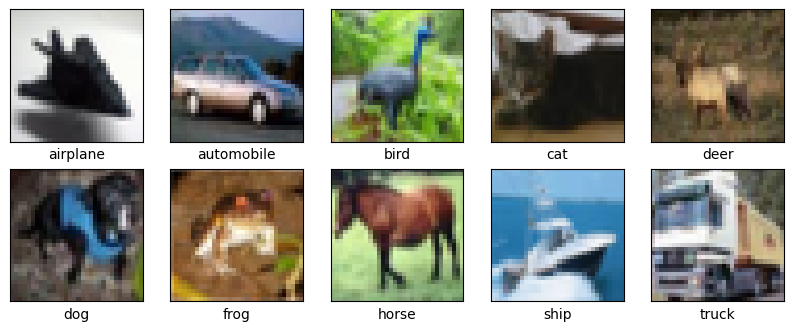

Epoch 1/10
1563/1563 [==============================] - 64s 40ms/step - loss: 1.5534 - accuracy: 0.4296 - val_loss: 1.2699 - val_accuracy: 0.5356
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2262 - accuracy: 0.5623 - val_loss: 1.1682 - val_accuracy: 0.5797
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0809 - accuracy: 0.6151 - val_loss: 1.0651 - val_accuracy: 0.6198
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9813 - accuracy: 0.6551 - val_loss: 1.0106 - val_accuracy: 0.6469
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9098 - accuracy: 0.6790 - val_loss: 0.9497 - val_accuracy: 0.6663
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8541 - accuracy: 0.6985 - val_loss: 0.9189 - val_accuracy: 0.6796
Epoch 7/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.8040 - accuracy: 0.7174 - val_loss: 0.8863 -

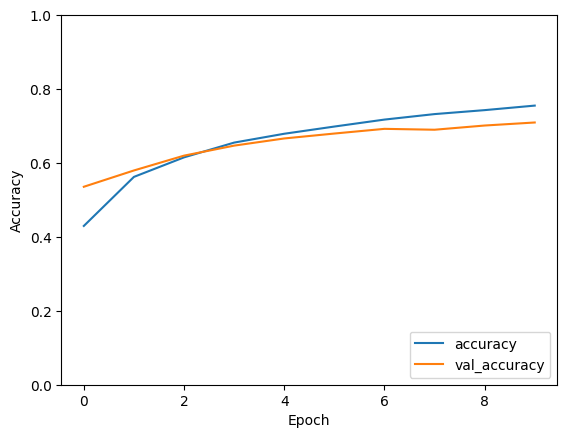

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

from google.colab import drive
from tensorflow.keras.preprocessing import image
import numpy as np


(train_images, train_labels), (test_images, test_labels)= datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(10):
 plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(train_images[train_labels.flatten() == i][0],
cmap=plt.cm.binary)
 plt.xlabel(class_names[i])
plt.show()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,
32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True,
dpi=300).create(prog='dot', format='svg'))

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()





